In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix


In [17]:
train_titanic = pd.read_csv("train_titanic.csv")
test_titanic = pd.read_csv("test_titanic.csv")

data = pd.concat([train_titanic, test_titanic], ignore_index=True)
data.drop(['Unnamed: 0', 'PassengerId'], axis=1,inplace = True)

median_age = data['Age'].median()
data['Age'].fillna(median_age, inplace=True)


data = pd.get_dummies(data, columns=['Emb_1', 'Emb_2', 'Emb_3', 'Sex'], drop_first=True)

print(data.head())



   Survived     Age      Fare  Pclass_1  Pclass_2  Pclass_3  Family_size  \
0         0  0.2750  0.014151         0         0         1          0.1   
1         1  0.4750  0.139136         1         0         0          0.1   
2         1  0.3250  0.015469         0         0         1          0.0   
3         1  0.4375  0.103644         1         0         0          0.1   
4         0  0.4375  0.015713         0         0         1          0.0   

   Title_1  Title_2  Title_3  Title_4  Emb_1_1  Emb_2_1  Emb_3_1  Sex_1  
0        1        0        0        0    False    False     True   True  
1        1        0        0        0     True    False    False  False  
2        0        0        0        1    False    False     True  False  
3        1        0        0        0    False    False     True  False  
4        1        0        0        0    False    False     True   True  


In [20]:
from sklearn.model_selection import train_test_split

# Rozdělení dat
X = data.drop('Survived', axis=1)  # Příznaky
y = data['Survived']  # Cílová proměnná

# Rozdělení dat na trénovací a testovací soubory (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Přesnost modelu
accuracy = accuracy_score(y_test, y_pred)
print("Přesnost modelu:", accuracy)

# ROC křivka a AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print("ROC AUC:", auc)

# Matice záměn (confusion matrix)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matice záměn:")
print(conf_matrix)

Přesnost modelu: 0.8395522388059702
ROC AUC: 0.8330485304169515
Matice záměn:
[[135  19]
 [ 24  90]]


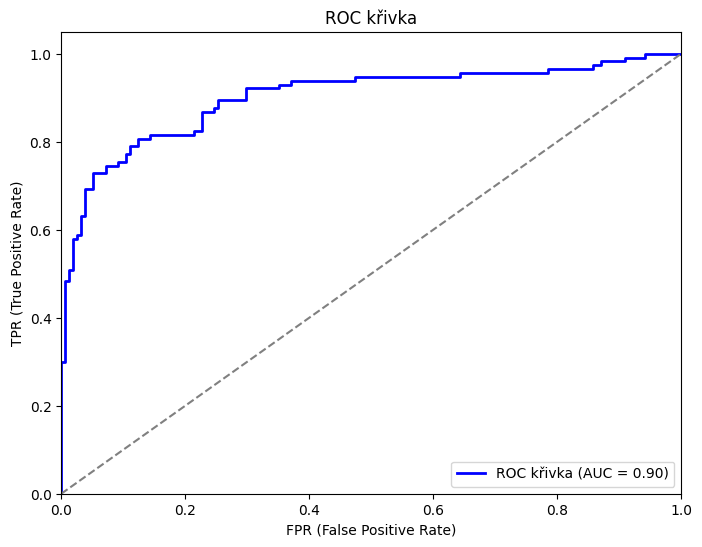

In [21]:
y_probs = model.predict_proba(X_test)
y_probs = y_probs[:, 1]  # Pravděpodobnost pro třídu 1

# Výpočet ROC křivky
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Výpočet plochy pod ROC křivkou (AUC)
auc = roc_auc_score(y_test, y_probs)

# Vykreslení ROC křivky
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC křivka (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR (False Positive Rate)')
plt.ylabel('TPR (True Positive Rate)')
plt.title('ROC křivka')
plt.legend(loc="lower right")
plt.show()